In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import sklearn

# Baseline Counts

In [2]:
for journal in ["Neurosurgery", "Operative_Neurosurgery", "Neurosurgery_Practice"]:
    original = pd.read_json(f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/dataset.json")
    print(f"Length of original dataset {len(original)}")

Length of original dataset 66052
Length of original dataset 12301
Length of original dataset 500


In [3]:
for journal in ["Neurosurgery", "Operative_Neurosurgery", "Neurosurgery_Practice"]:
    tech_check = pd.read_json(f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/dataset_with_in_text.json")
    print(f"Length after tech check {len(tech_check)}")

Length after tech check 52980
Length after tech check 10163
Length after tech check 429


# Resnet Performance

In [4]:
df = pd.read_csv("/gpfs/data/oermannlab/users/alyaka01/CNS-Obsidian/cns_obsidian/instruct/to_filter_a_dataset/transformed_labeled_images.csv",
                index_col=0).sample(frac=1)

In [5]:
#df.iloc[:, -1].value_counts() / 500

np.random.seed(314)
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
X = df.iloc[:400, :-1].values
y = (df.iloc[:400, -1].values.reshape(-1) == 2)

X_test = df.iloc[400:, :-1].values
y_test = (df.iloc[400:, -1].values.reshape(-1) == 2)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=0).fit(X, y)

print('training loss (over 400 labeled keep/drop')
print(classification_report(y, clf.predict(X),
      target_names=['drop', 'keep']))

training loss (over 400 labeled keep/drop
              precision    recall  f1-score   support

        drop       1.00      1.00      1.00       262
        keep       1.00      1.00      1.00       138

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [8]:
print('validation loss (over 100 labeled keep/drop')
print(classification_report(y_test, clf.predict(X_test),
      target_names=['drop', 'keep']))

validation loss (over 100 labeled keep/drop
              precision    recall  f1-score   support

        drop       0.94      0.93      0.93        68
        keep       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



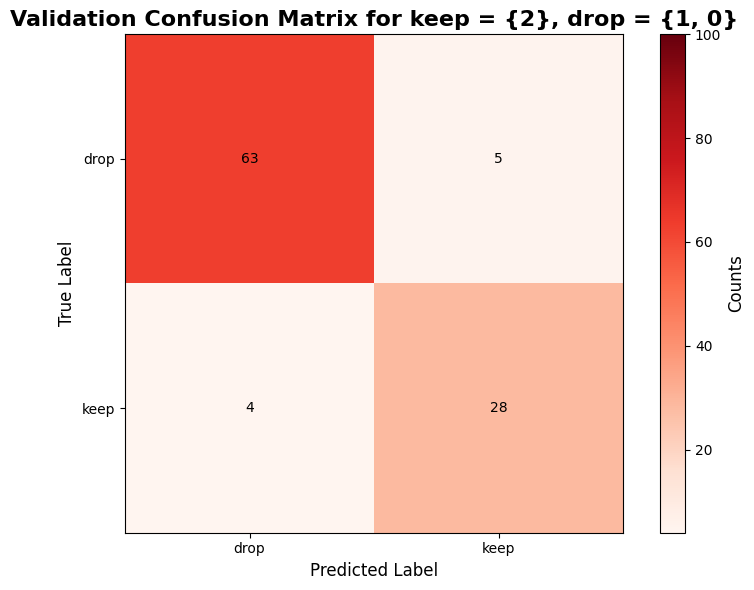

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix computation
confusion_mat = confusion_matrix(y_test, clf.predict(X_test), labels=[0, 1])

# Labels for classes
class_labels = ["drop", "keep"]

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Use imshow to customize vmax
im = ax.imshow(confusion_mat, cmap="Reds", vmax=100)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Counts', fontsize=12)

# Add gridlines and ticks
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Label axes
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Add title
plt.title("Validation Confusion Matrix for keep = {2}, drop = {1, 0}", fontsize=16, weight='bold')

# Annotate each cell with the count
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, confusion_mat[i, j], ha="center", va="center", color="black")

# Show the plot
plt.tight_layout()
plt.savefig("./figures/obsidian_figure_s1a.png")
plt.show()

In [10]:
X = df.iloc[:400, :-1].values
y = (df.iloc[:400, -1].isin([1, 2]).values.reshape(-1))

X_test = df.iloc[400:, :-1].values
y_test = (df.iloc[400:, -1].isin([1, 2]).values.reshape(-1))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=0).fit(X, y)

print('training loss (over 400 labeled keep/drop')
print(classification_report(y, clf.predict(X),
      target_names=['drop', 'keep']))

training loss (over 400 labeled keep/drop
              precision    recall  f1-score   support

        drop       1.00      1.00      1.00       121
        keep       1.00      1.00      1.00       279

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [12]:
print('validation loss (over 100 labeled keep/drop')
print(classification_report(y_test, clf.predict(X_test),
      target_names=['drop', 'keep']))

validation loss (over 100 labeled keep/drop
              precision    recall  f1-score   support

        drop       0.76      0.93      0.83        27
        keep       0.97      0.89      0.93        73

    accuracy                           0.90       100
   macro avg       0.86      0.91      0.88       100
weighted avg       0.91      0.90      0.90       100



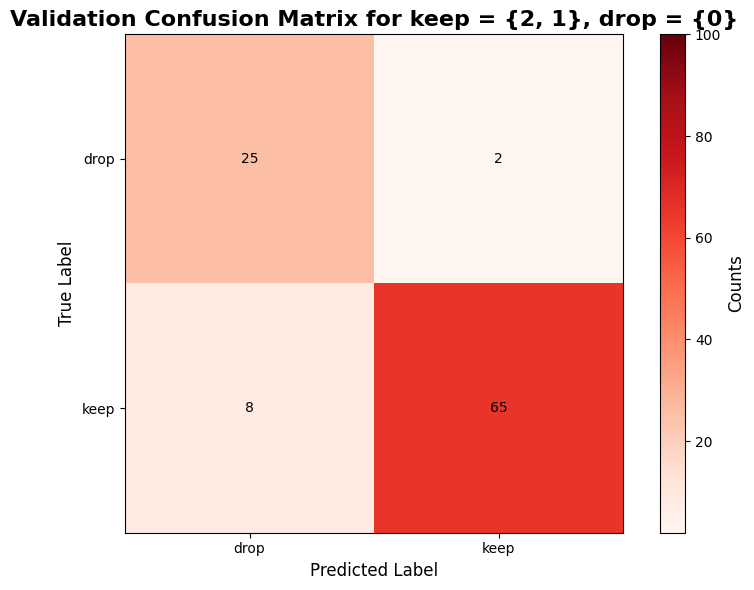

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix computation
confusion_mat = confusion_matrix(y_test, clf.predict(X_test), labels=[0, 1])

# Labels for classes
class_labels = ["drop", "keep"]

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Use imshow to customize vmax
im = ax.imshow(confusion_mat, cmap="Reds", vmax=100)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Counts', fontsize=12)

# Add gridlines and ticks
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Label axes
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Add title
plt.title("Validation Confusion Matrix for keep = {2, 1}, drop = {0}", fontsize=16, weight='bold')

# Annotate each cell with the count
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, confusion_mat[i, j], ha="center", va="center", color="black")

# Show the plot
plt.tight_layout()
plt.savefig("./figures/obsidian_figure_s1b.png")
plt.show()

# Post-ResNet Results

In [14]:
# # need to run this later
# from cns_obsidian.instruct.to_filter_a_dataset import create_filtering_function

# for journal in ["Neurosurgery", "Operative_Neurosurgery", "Neurosurgery_Practice"]:
#     tech_check = pd.read_json(f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/dataset_with_in_text.json")
#     filterer = create_filtering_function("/gpfs/data/oermannlab/users/alyaka01/PurpleFlamingo/purple_flamingo/instruct/to_filter_a_dataset/transformed_labeled_images.csv",
#                                          f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/images",
#                                          [1, 2])
#     total = 0
#     for i, entry in tqdm(tech_check.iterrows()):
#         total += filterer(entry)

# Final Datasets

In [15]:
for journal in ["Neurosurgery", "Operative_Neurosurgery", "Neurosurgery_Practice"]:
    for t in ["_train", "_val", "_test", ""]:
        print(f"Journal: {journal};", f"type {t}")
        df = pd.read_json(f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/full_journal_dataset_both{t}.json")
        display(df[['mode', 'source']].value_counts().sort_values())
        print()

Journal: Neurosurgery; type _train


mode  source
ddx   claude    17924
      gpt       17955
mc    claude    33207
      gpt       34542
ift   claude    50052
      gpt       50107
Name: count, dtype: int64


Journal: Neurosurgery; type _val


mode  source
ddx   claude     502
      gpt        502
mc    claude     892
      gpt        920
ift   claude    1369
      gpt       1370
Name: count, dtype: int64


Journal: Neurosurgery; type _test


mode  source
ddx   claude     507
      gpt        507
mc    claude    1044
      gpt       1085
ift   gpt       1502
      claude    1502
Name: count, dtype: int64


Journal: Neurosurgery; type 


mode  source
ddx   claude    18933
      gpt       18964
mc    claude    35143
      gpt       36547
ift   claude    52923
      gpt       52979
Name: count, dtype: int64


Journal: Operative_Neurosurgery; type _train


mode  source
ddx   claude    3857
      gpt       3857
mc    claude    8076
      gpt       8430
ift   claude    9677
      gpt       9686
Name: count, dtype: int64


Journal: Operative_Neurosurgery; type _val


mode  source
ddx   claude    109
      gpt       109
mc    claude    203
      gpt       211
ift   gpt       247
      claude    247
Name: count, dtype: int64


Journal: Operative_Neurosurgery; type _test


mode  source
ddx   claude    108
      gpt       108
mc    claude    191
      gpt       193
ift   claude    230
      gpt       231
Name: count, dtype: int64


Journal: Operative_Neurosurgery; type 


mode  source
ddx   claude     4074
      gpt        4074
mc    claude     8470
      gpt        8834
ift   claude    10154
      gpt       10164
Name: count, dtype: int64


Journal: Neurosurgery_Practice; type _train


mode  source
ddx   claude    169
      gpt       169
mc    claude    270
      gpt       292
ift   claude    411
      gpt       413
Name: count, dtype: int64


Journal: Neurosurgery_Practice; type _val


mode  source
ddx   claude     5
      gpt        5
mc    claude    11
ift   gpt       12
mc    gpt       12
ift   claude    12
Name: count, dtype: int64


Journal: Neurosurgery_Practice; type _test


mode  source
ddx   claude    4
      gpt       4
ift   claude    4
      gpt       4
mc    claude    4
      gpt       4
Name: count, dtype: int64


Journal: Neurosurgery_Practice; type 


mode  source
ddx   claude    178
      gpt       178
mc    claude    285
      gpt       308
ift   claude    427
      gpt       429
Name: count, dtype: int64

In [16]:
# Token Counts

In [17]:
from transformers import LlavaNextProcessor

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-34b-hf")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [18]:
def token_counts(x):
    return len(processor.tokenizer.encode(processor.apply_chat_template(x)))

In [19]:
for journal in ["Neurosurgery", "Operative_Neurosurgery", "Neurosurgery_Practice"]:
    for t in ["_train", "_val", "_test", ""]:
        print(f"Journal: {journal};", f"type {t}")
        df = pd.read_json(f"/gpfs/data/oermannlab/private_data/TheMedScrolls/FiguresJadenTextract/{journal}/full_journal_dataset_both{t}.json")
        df['token_counts'] = df['conversations'].apply(token_counts)
        display(df.groupby(['mode', 'source'])['token_counts'].sum().sort_index())
        print()

Journal: Neurosurgery; type _train


mode  source
ddx   claude     1742064
      gpt        1719587
ift   claude    19667860
      gpt       13494129
mc    claude    13749498
      gpt       14710902
Name: token_counts, dtype: int64


Journal: Neurosurgery; type _val


mode  source
ddx   claude     48780
      gpt        47630
ift   claude    532244
      gpt       359022
mc    claude    364983
      gpt       387305
Name: token_counts, dtype: int64


Journal: Neurosurgery; type _test


mode  source
ddx   claude     49491
      gpt        48807
ift   claude    599475
      gpt       405123
mc    claude    436168
      gpt       460105
Name: token_counts, dtype: int64


Journal: Neurosurgery; type 


mode  source
ddx   claude     1840335
      gpt        1816129
ift   claude    20799579
      gpt       14258274
mc    claude    14550649
      gpt       15558312
Name: token_counts, dtype: int64


Journal: Operative_Neurosurgery; type _train


mode  source
ddx   claude     376429
      gpt        368241
ift   claude    3906550
      gpt       2667155
mc    claude    3336227
      gpt       3489058
Name: token_counts, dtype: int64


Journal: Operative_Neurosurgery; type _val


mode  source
ddx   claude     10725
      gpt        10629
ift   claude    100842
      gpt        69920
mc    claude     85113
      gpt        90702
Name: token_counts, dtype: int64


Journal: Operative_Neurosurgery; type _test


mode  source
ddx   claude    10466
      gpt       10375
ift   claude    92578
      gpt       64179
mc    claude    80233
      gpt       83317
Name: token_counts, dtype: int64


Journal: Operative_Neurosurgery; type 


mode  source
ddx   claude     397620
      gpt        389207
ift   claude    4099970
      gpt       2801254
mc    claude    3501573
      gpt       3663077
Name: token_counts, dtype: int64


Journal: Neurosurgery_Practice; type _train


mode  source
ddx   claude     16884
      gpt        16851
ift   claude    165957
      gpt       113258
mc    claude    118474
      gpt       126523
Name: token_counts, dtype: int64


Journal: Neurosurgery_Practice; type _val


mode  source
ddx   claude     521
      gpt        490
ift   claude    4623
      gpt       3172
mc    claude    4700
      gpt       5049
Name: token_counts, dtype: int64


Journal: Neurosurgery_Practice; type _test


mode  source
ddx   claude     380
      gpt        383
ift   claude    1600
      gpt       1757
mc    claude    1635
      gpt       2032
Name: token_counts, dtype: int64


Journal: Neurosurgery_Practice; type 


mode  source
ddx   claude     17785
      gpt        17703
ift   claude    172180
      gpt       118187
mc    claude    124809
      gpt       133604
Name: token_counts, dtype: int64